# **Recurrent Neural Networks (RNNs)**

*Based on Chapter X of "Speech and Language Processing" by Jurafsky & Martin*  

## **1. Introduction to Recurrent Neural Networks (RNNs)**

Recurrent Neural Networks (RNNs) are a class of neural networks designed to recognize patterns in sequences of data, such as time series, natural language, or video frames. Unlike traditional feedforward neural networks, RNNs have connections that form directed cycles, allowing them to maintain a hidden state that captures information from previous inputs in the sequence.

---

## **2. Understanding RNNs**

### **Basic RNN Architecture**

An RNN processes sequences by iterating through the input tokens and maintaining a hidden state that captures information about previous tokens. The basic architecture can be visualized as follows:

![Basic RNN Architecture](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

*Figure: Basic RNN Architecture*

**Mathematical Formulation:**

At each time step \( t \), the RNN updates its hidden state \( h_t \) and produces an output \( o_t \):

$$
h_t = \tanh(W_{ih}x_t + W_{hh}h_{t-1} + b_h)
$$

$$
o_t = W_{ho}h_t + b_o
$$

Where:
- \( x_t \) is the input at time \( t \).
- \( h_{t-1} \) is the hidden state from the previous time step.
- \( W_{ih} \), \( W_{hh} \), and \( W_{ho} \) are weight matrices.
- \( b_h \) and \( b_o \) are bias vectors.
- \( \tanh \) is the activation function.

### **Applications of RNNs**

RNNs are widely used in various applications, including:

- **Natural Language Processing (NLP):** Language modeling, machine translation, sentiment analysis.
- **Speech Recognition:** Transcribing spoken language into text.
- **Time Series Prediction:** Forecasting stock prices, weather conditions.
- **Music Generation:** Composing melodies and harmonies.

---

## **3. Challenges in Training RNNs**

While RNNs are powerful for sequence modeling, they face significant challenges during training, primarily due to gradient-related issues.

### **Vanishing Gradients**

**Problem:**
During backpropagation through time (BPTT), gradients can become extremely small, effectively preventing the network from learning long-range dependencies in the data.

**Impact:**
- Difficulty in capturing dependencies that are far apart in the sequence.
- Slow convergence or failure to train effectively.

**Visualization:**

![Vanishing Gradients](https://miro.medium.com/v2/resize:fit:716/1*-rPcuafUSo-SwZF121y_rQ.png)

*Figure: Illustration of Vanishing Gradients*

### **Exploding Gradients**

**Problem:**
Gradients can also become excessively large during training, leading to numerical instability.

**Impact:**
- Parameters can grow exponentially, causing the model to diverge.
- Training becomes unstable and may fail to converge.

**Visualization:**

![Exploding Gradients](https://miro.medium.com/v2/resize:fit:700/1*AOwXWfBegd-qlr2RV_YmDg.png)

*Figure: Illustration of Exploding Gradients*

---

## **4. Advanced RNN Architectures**

To address the challenges of vanishing and exploding gradients, more sophisticated RNN architectures have been developed.

### **Long Short-Term Memory (LSTM)**

**Overview:**
Introduced by Hochreiter and Schmidhuber in 1997, LSTM networks are a type of RNN capable of learning long-term dependencies. They mitigate the vanishing gradient problem through a more complex architecture that includes memory cells and gating mechanisms.

**Key Components:**
- **Cell State (\( C_t \)):** Carries information across time steps with minimal modification.
- **Gates:** Control the flow of information.
    - **Forget Gate (\( f_t \))**: Decides what information to discard from the cell state.
    - **Input Gate (\( i_t \))**: Decides which new information to add to the cell state.
    - **Output Gate (\( o_t \))**: Decides what information to output based on the cell state.

**Mathematical Formulation:**

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$

$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

$$
C_t = f_t * C_{t-1} + i_t * \tilde{C}_t
$$

$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$

$$
h_t = o_t * \tanh(C_t)
$$

### **Gated Recurrent Unit (GRU)**

**Overview:**
Proposed by Cho et al. in 2014, GRUs are a simpler variant of LSTMs that also aim to solve the vanishing gradient problem. They combine the forget and input gates into a single update gate and merge the cell state and hidden state.

**Key Components:**
- **Update Gate (\( z_t \))**: Determines how much of the past information needs to be passed along to the future.
- **Reset Gate (\( r_t \))**: Determines how to combine the new input with the previous memory.

**Mathematical Formulation:**

$$
z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)
$$

$$
r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
$$

$$
\tilde{h}_t = \tanh(W \cdot [r_t * h_{t-1}, x_t] + b)
$$

$$
h_t = (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t
$$

**Advantages:**
- Fewer parameters than LSTM.
- Faster to train while maintaining similar performance.

---

## **5. Practical Implementation with PyTorch**

In this section, we'll implement RNNs, LSTMs, and GRUs using **PyTorch**, demonstrate how to handle vanishing and exploding gradients, and visualize the effects.

### **Building a Simple RNN**

We'll start by building a simple RNN from scratch to understand its workings.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

#### **RNN Cell Implementation**

In [2]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        
        # Define layers
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)  # Concatenate input and hidden state
        hidden = torch.tanh(self.i2h(combined))
        output = self.softmax(self.i2o(combined))
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


#### **Dataset Preparation**

For demonstration, we'll create a toy dataset for a simple classification task.


In [3]:
# Toy dataset: binary classification based on sum of input vector
np.random.seed(0)
torch.manual_seed(0)

# Generate random data
data_size = 1000
input_size = 10
hidden_size = 20
output_size = 2  # Binary classification

# Inputs
X = np.random.randn(data_size, input_size)

# Labels: if sum > 0, class 1 else class 0
y = (X.sum(axis=1) > 0).astype(int)
y = torch.tensor(y, dtype=torch.long).view(-1, 1)


#### **Training the Simple RNN**


In [4]:
# Instantiate the model, define loss and optimizer
model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

# Training loop
num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(data_size):
        input_tensor = torch.tensor(X[i], dtype=torch.float).view(1, -1)
        target = y[i]
        
        hidden = model.initHidden()
        
        model.zero_grad()
        
        output, hidden = model(input_tensor, hidden)
        loss = criterion(output, target)
        loss.backward()
        
        optimizer.step()
        
        total_loss += loss.item()
    
    average_loss = total_loss / data_size
    loss_history.append(average_loss)
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}')

Epoch 10/100, Loss: 0.1195
Epoch 20/100, Loss: 0.0909
Epoch 30/100, Loss: 0.0777
Epoch 40/100, Loss: 0.0697
Epoch 50/100, Loss: 0.0641
Epoch 60/100, Loss: 0.0598
Epoch 70/100, Loss: 0.0565
Epoch 80/100, Loss: 0.0537
Epoch 90/100, Loss: 0.0514
Epoch 100/100, Loss: 0.0495


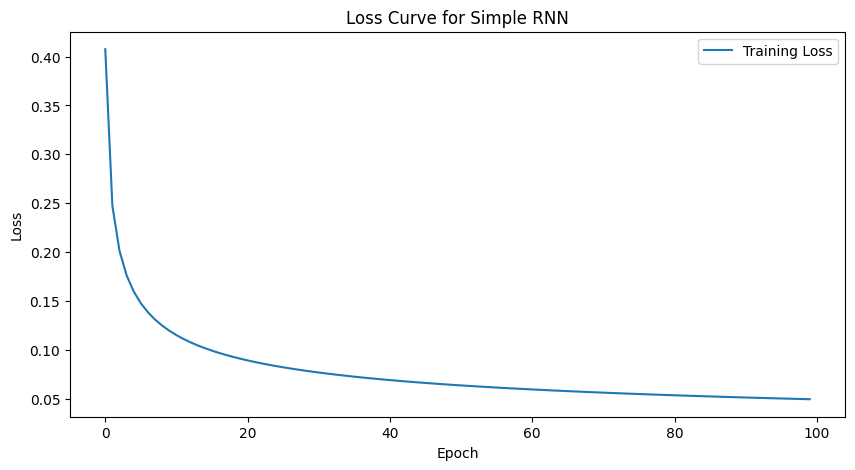

In [5]:
plt.figure(figsize=(10,5))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for Simple RNN')
plt.legend()
plt.show()

### **Implementing LSTM and GRU**

PyTorch provides built-in modules for LSTM and GRU, simplifying their implementation.

#### **LSTM Implementation**

In [6]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        
        # Define LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Define output layer
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the last time step
        out = self.fc(out[:, -1, :])
        out = self.softmax(out)
        return out

#### **GRU Implementation**

In [7]:
class GRUClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        
        # Define GRU layer
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        
        # Define output layer
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        
        # Forward propagate GRU
        out, _ = self.gru(x, h0)  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the last time step
        out = self.fc(out[:, -1, :])
        out = self.softmax(out)
        return out

#### **Preparing Data for LSTM and GRU**

In [8]:
# Reshape data for LSTM and GRU
# LSTM expects input of shape (batch_size, seq_length, input_size)
# We'll treat each input vector as a sequence of length 1
X_lstm = torch.tensor(X, dtype=torch.float).view(data_size, 1, input_size)
y_lstm = y.squeeze()

# Create TensorDataset and DataLoader
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X_lstm, y_lstm)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#### **Training the LSTM Classifier**

In [9]:
# Instantiate the model, define loss and optimizer
hidden_size = 50
model_lstm = LSTMClassifier(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)

# Training loop
num_epochs = 100
loss_history_lstm = []

for epoch in range(num_epochs):
    total_loss = 0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model_lstm(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    average_loss = total_loss / len(dataloader)
    loss_history_lstm.append(average_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}')

Epoch 5/100, Loss: 0.2766
Epoch 10/100, Loss: 0.1093
Epoch 15/100, Loss: 0.0684
Epoch 20/100, Loss: 0.0515
Epoch 25/100, Loss: 0.0384
Epoch 30/100, Loss: 0.0323
Epoch 35/100, Loss: 0.0289
Epoch 40/100, Loss: 0.0234
Epoch 45/100, Loss: 0.0194
Epoch 50/100, Loss: 0.0172
Epoch 55/100, Loss: 0.0152
Epoch 60/100, Loss: 0.0136
Epoch 65/100, Loss: 0.0121
Epoch 70/100, Loss: 0.0108
Epoch 75/100, Loss: 0.0095
Epoch 80/100, Loss: 0.0084
Epoch 85/100, Loss: 0.0077
Epoch 90/100, Loss: 0.0070
Epoch 95/100, Loss: 0.0067
Epoch 100/100, Loss: 0.0055


#### **Training the GRU Classifier**

In [10]:
# Instantiate the model, define loss and optimizer
model_gru = GRUClassifier(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.001)

# Training loop
num_epochs = 100
loss_history_gru = []

for epoch in range(num_epochs):
    total_loss = 0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model_gru(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    average_loss = total_loss / len(dataloader)
    loss_history_gru.append(average_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}')

Epoch 5/100, Loss: 0.2086
Epoch 10/100, Loss: 0.0944
Epoch 15/100, Loss: 0.0655
Epoch 20/100, Loss: 0.0492
Epoch 25/100, Loss: 0.0385
Epoch 30/100, Loss: 0.0324
Epoch 35/100, Loss: 0.0302
Epoch 40/100, Loss: 0.0264
Epoch 45/100, Loss: 0.0209
Epoch 50/100, Loss: 0.0193
Epoch 55/100, Loss: 0.0165
Epoch 60/100, Loss: 0.0147
Epoch 65/100, Loss: 0.0128
Epoch 70/100, Loss: 0.0122
Epoch 75/100, Loss: 0.0109
Epoch 80/100, Loss: 0.0096
Epoch 85/100, Loss: 0.0087
Epoch 90/100, Loss: 0.0079
Epoch 95/100, Loss: 0.0071
Epoch 100/100, Loss: 0.0063


#### **Plotting the Loss Curves**

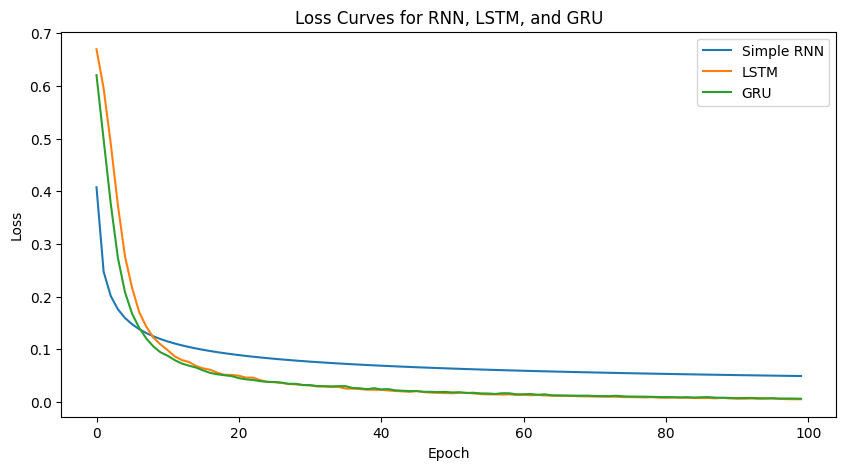

In [11]:
plt.figure(figsize=(10,5))
plt.plot(loss_history, label='Simple RNN')
plt.plot(loss_history_lstm, label='LSTM')
plt.plot(loss_history_gru, label='GRU')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves for RNN, LSTM, and GRU')
plt.legend()
plt.show()

### **Handling Vanishing and Exploding Gradients**

PyTorch provides utilities to manage exploding gradients, primarily through gradient clipping.

#### **Gradient Clipping**

Gradient clipping prevents the gradients from becoming too large, addressing the exploding gradient problem.


In [12]:
class SyntheticDataset(Dataset):
    def __init__(self, num_samples=500, input_size=10, output_size=5, seq_length=15):
        super(SyntheticDataset, self).__init__()
        self.num_samples = num_samples
        self.input_size = input_size
        self.output_size = output_size
        self.seq_length = seq_length
        
        # Generate random input data
        self.data = torch.randn(num_samples, seq_length, input_size) * 5.0  # Scale to increase gradient magnitudes
        
        # Generate random labels
        self.labels = torch.randint(0, output_size, (num_samples,))
    
    def __len__(self):
        return self.num_samples
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [13]:
# Example of gradient clipping in training loop

# Define a new training loop with gradient clipping for the GRU model
model_gru = GRUClassifier(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.001)

num_epochs = 100
loss_history_gru_clip = []

for epoch in range(num_epochs):
    total_loss = 0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model_gru(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model_gru.parameters(), max_norm=1.0)
        
        optimizer.step()
        total_loss += loss.item()
    
    average_loss = total_loss / len(dataloader)
    loss_history_gru_clip.append(average_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}')

Epoch 5/100, Loss: 0.2250
Epoch 10/100, Loss: 0.0990
Epoch 15/100, Loss: 0.0657
Epoch 20/100, Loss: 0.0483
Epoch 25/100, Loss: 0.0394
Epoch 30/100, Loss: 0.0340
Epoch 35/100, Loss: 0.0298
Epoch 40/100, Loss: 0.0268
Epoch 45/100, Loss: 0.0214
Epoch 50/100, Loss: 0.0186
Epoch 55/100, Loss: 0.0167
Epoch 60/100, Loss: 0.0155
Epoch 65/100, Loss: 0.0132
Epoch 70/100, Loss: 0.0122
Epoch 75/100, Loss: 0.0119
Epoch 80/100, Loss: 0.0116
Epoch 85/100, Loss: 0.0090
Epoch 90/100, Loss: 0.0082
Epoch 95/100, Loss: 0.0081
Epoch 100/100, Loss: 0.0067



#### **Visualization of Gradients**

To visualize the effect of vanishing and exploding gradients, we can monitor the norm of gradients during training.


In [14]:
def compute_total_grad_norm(model):
    total_norm = 0.0
    for param in model.parameters():
        if param.grad is not None:
            param_norm = param.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
    total_norm = total_norm ** 0.5
    return total_norm

def monitor_gradients(model, dataloader, criterion, optimizer, max_norm=1.0):
    grad_norms_before = []
    grad_norms_after = []
    
    model.train()  # Ensure the model is in training mode
    
    for batch_idx, (inputs, targets) in enumerate(dataloader):
        optimizer.zero_grad()  # Reset gradients
        
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass
        
        # Compute gradient norm before clipping
        total_norm_before = compute_total_grad_norm(model)
        grad_norms_before.append(total_norm_before)
        
        # Apply gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)
        
        # Compute gradient norm after clipping
        total_norm_after = compute_total_grad_norm(model)
        grad_norms_after.append(total_norm_after)
        
        optimizer.step()  # Update parameters
        
        # Optional: Print progress
        if (batch_idx + 1) % 50 == 0:
            print(f"Processed {batch_idx + 1}/{len(dataloader)} batches")
    
    return grad_norms_before, grad_norms_after


In [15]:
# Hyperparameters
input_size = 10
hidden_size = 20
output_size = 5
seq_length = 15
batch_size = 32
learning_rate = 0.1  # Increased to produce larger gradients
num_samples = 500
max_norm = 1.0  # Threshold for gradient clipping

# Create dataset and dataloader
dataset = SyntheticDataset(num_samples=num_samples, input_size=input_size, output_size=output_size, seq_length=seq_length)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, optimizer
model_gru = GRUClassifier(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_gru.parameters(), lr=learning_rate)

# Monitor gradients before and after clipping
grad_norms_before, grad_norms_after = monitor_gradients(
    model_gru, dataloader, criterion, optimizer, max_norm=max_norm
)

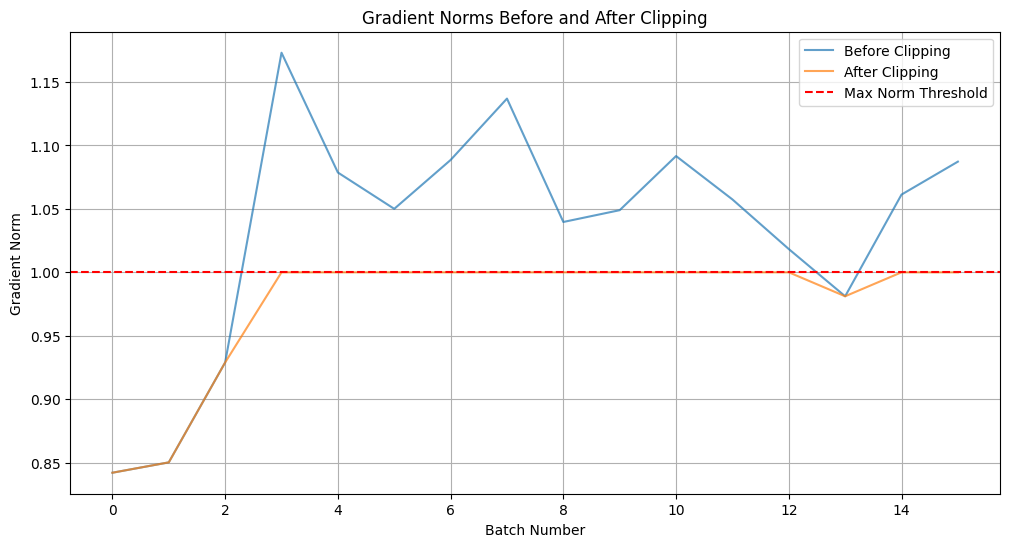

Sample Gradient Norms:
Batch 1: Before = 0.8419, After = 0.8419
Batch 2: Before = 0.8501, After = 0.8501
Batch 3: Before = 0.9289, After = 0.9289
Batch 4: Before = 1.1732, After = 1.0000
Batch 5: Before = 1.0787, After = 1.0000


In [16]:
# Plotting gradient norms
plt.figure(figsize=(12,6))
plt.plot(grad_norms_before, label='Before Clipping', alpha=0.7)
plt.plot(grad_norms_after, label='After Clipping', alpha=0.7)
plt.axhline(y=max_norm, color='r', linestyle='--', label='Max Norm Threshold')
plt.xlabel('Batch Number')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norms Before and After Clipping')
plt.legend()
plt.grid(True)
plt.show()

# Print sample gradient norms for inspection
print("Sample Gradient Norms:")
for i in range(5):
    print(f"Batch {i+1}: Before = {grad_norms_before[i]:.4f}, After = {grad_norms_after[i]:.4f}")



**Interpretation:**

- **Before Clipping:** The gradient norms are significantly higher than `max_norm = 1.0`.
- **After Clipping:** All gradient norms are reduced to `1.0`, ensuring stable training.

### **a. Importance of Gradient Clipping**

**Gradient Clipping** is essential for:

- **Preventing Exploding Gradients:** Especially in deep networks or RNNs like GRUs and LSTMs, gradients can grow exponentially, destabilizing training.
- **Ensuring Stable Training:** By capping gradients, we maintain consistent updates, leading to smoother convergence.

### **b. Choosing Appropriate Hyperparameters**

- **Learning Rate:** A higher learning rate can lead to larger gradients but may cause instability. Balancing the learning rate is crucial.
- **Clipping Threshold (`max_norm`):** Setting this value requires experimentation. A common starting point is between `1.0` and `5.0`.

### **c. Monitoring Gradient Norms in Practice**

Regularly monitoring gradient norms during training helps:

- **Diagnose Training Issues:** Extremely high or low gradient norms can indicate problems like vanishing or exploding gradients.
- **Adjust Hyperparameters:** Based on gradient behavior, you can fine-tune learning rates, clipping thresholds, or model architecture.


## **6. Conclusion**

In this notebook, we've delved into the fundamentals of **Recurrent Neural Networks (RNNs)**, explored the challenges of **vanishing and exploding gradients**, and examined advanced architectures like **LSTM** and **GRU**. Through practical implementations using **PyTorch**, we've seen how these models can be built, trained, and optimized for sequence modeling tasks.

**Key Takeaways:**

1. **RNNs** are powerful for modeling sequential data but suffer from gradient-related challenges.
2. **Vanishing Gradients** hinder learning long-term dependencies, while **Exploding Gradients** can destabilize training.
3. **LSTM** and **GRU** architectures effectively address these challenges through gating mechanisms.
4. **PyTorch** provides robust tools and modules to implement and train these models efficiently.
5. **Gradient Clipping** is a practical technique to prevent exploding gradients and stabilize training.

---

## **7. References**

- [Jurafsky & Martin - Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/)
- [Elman, J. L. (1990). Finding structure in time](https://doi.org/10.1515/9781400833599-002)
- [Hochreiter, S., & Schmidhuber, J. (1997). Long Short-Term Memory](https://www.bioinf.jku.at/publications/older/2604.pdf)
- [Cho, K., et al. (2014). Learning Phrase Representations using RNN Encoder-Decoder for Statistical Machine Translation](https://arxiv.org/abs/1406.1078)
- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
- [Understanding the difficulty of training deep feedforward neural networks](https://proceedings.neurips.cc/paper/2010/file/0c1d2ce14a0c5fb6c1246f5c6d2f3d1f-Paper.pdf)
- [Exploding Gradients in RNNs](https://towardsdatascience.com/exploding-gradients-in-neural-networks-89f76620a9fc)
- [Vanishing Gradients in Neural Networks](https://towardsdatascience.com/vanishing-gradients-in-neural-networks-8f04f34c3a5d)
